In [49]:
import matplotlib.pyplot as plt
from citipy import citipy as cp
import pandas as pd

## Generate Cities List

In [50]:
#Grab list of cities based on coordinates from citipy
citylist = []
count = 0
dup = 'no'

for x in range(-90,90,1):
    for y in range(-180,180,1):
        city = cp.nearest_city(x, y)
        citdict = {}
        citdict['city'] = city.city_name
        citdict['country'] = city.country_code
        citdict['lat'] = x
        citdict['long'] = y
        if len(citylist) == 0:
            citylist.append(citdict)
            count+=1
            continue
        else:
            #Get rid of duplicates
            for city in citylist:
                if city['city'] == citdict['city']:
                    dup = 'yes'
        if dup == 'no':
            citylist.append(citdict)
            count+=1
        else:
            dup = 'no'

print(len(citylist))

7957


In [51]:
print(citylist[0])



{'city': 'vaini', 'country': 'to', 'lat': -90, 'long': -180}


In [52]:
import requests as req
import json

In [53]:

#Create dataframe. Grab 500 random cities#Create  
citypd = pd.DataFrame({
    'city': [x['city'] for x in citylist],
    'country': [x['country'] for x in citylist],
})

citypd.head()

samplecity = citypd.sample(500)

In [54]:
samplecity

,city,country
1166,irara,br
130,port shepstone,za
3106,kodar,in
4446,acin,af
5375,sulmona,it
3771,yongan,cn
6180,rossland,ca
5369,sainte-maxime,fr
2047,torit,sd
7734,blagoyevo,ru


## Perform API Calls

In [55]:
# OpenWeatherMap API Key
from config import api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?"

units = "Imperial"
count = 0
samplecity['latitude'] = ""
samplecity['longitude'] = ""
samplecity['temperature'] = ""
samplecity['humidity'] = ""
samplecity['cloudiness'] = ""
samplecity['wind_speed'] = ""

for index,row in samplecity.iterrows():
    count+= 1
    query_url = url + "appid=" + api_key + "&units=" + units + "&q=" + row['city']
    try:
        weather_response = req.get(query_url)
        cityweather = weather_response.json()
#         print(cityweather)
        samplecity.set_value(index, "latitude", int(cityweather['coord']['lat']))
        samplecity.set_value(index, "longitude", int(cityweather['coord']['lat']))
        samplecity.set_value(index, "temperature", int(cityweather['main']['temp']))
        samplecity.set_value(index, "humidity", int(cityweather['main']['humidity']))
        samplecity.set_value(index, "cloudiness", int(cityweather['clouds']['all']))
        samplecity.set_value(index, "wind_speed", int(cityweather['wind']['speed']))
    except:
        print(f"No data for this city: {row['city']}")
    print(f"This is city#: {count}")
    print(f"This is: {row['city']}" )
    print(f"This is the requested URL: {query_url}")

C:\Users\Madeeha\AppData\Local\conda\conda\envs\faisal\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Madeeha\AppData\Local\conda\conda\envs\faisal\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Madeeha\AppData\Local\conda\conda\envs\faisal\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Madeeha\AppData\Local\conda\conda\envs\faisal\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Madeeha\AppData\Local\conda\conda\envs\faisal\lib\site-packages\ipykernel_launcher.py:27: Futur

This is city#: 1
This is: irara
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=13a397335cdcb11c038d9da966771268&units=Imperial&q=irara
This is city#: 2
This is: port shepstone
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=13a397335cdcb11c038d9da966771268&units=Imperial&q=port shepstone
This is city#: 3
This is: kodar
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=13a397335cdcb11c038d9da966771268&units=Imperial&q=kodar
No data for this city: acin
This is city#: 4
This is: acin
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=13a397335cdcb11c038d9da966771268&units=Imperial&q=acin
This is city#: 5
This is: sulmona
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=13a397335cdcb11c038d9da966771268&units=Imperial&q=sulmona
This is city#: 6
This is: yongan
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid

This is city#: 48
This is: jaru
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=13a397335cdcb11c038d9da966771268&units=Imperial&q=jaru
This is city#: 49
This is: mongar
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=13a397335cdcb11c038d9da966771268&units=Imperial&q=mongar
This is city#: 50
This is: xiaolingwei
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=13a397335cdcb11c038d9da966771268&units=Imperial&q=xiaolingwei
This is city#: 51
This is: alghero
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=13a397335cdcb11c038d9da966771268&units=Imperial&q=alghero
This is city#: 52
This is: boralday
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=13a397335cdcb11c038d9da966771268&units=Imperial&q=boralday
This is city#: 53
This is: nueva helvecia
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=13a397335cd

This is city#: 95
This is: florence
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=13a397335cdcb11c038d9da966771268&units=Imperial&q=florence
This is city#: 96
This is: tougan
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=13a397335cdcb11c038d9da966771268&units=Imperial&q=tougan
This is city#: 97
This is: chingola
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=13a397335cdcb11c038d9da966771268&units=Imperial&q=chingola
This is city#: 98
This is: orchard homes
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=13a397335cdcb11c038d9da966771268&units=Imperial&q=orchard homes
This is city#: 99
This is: barao de melgaco
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=13a397335cdcb11c038d9da966771268&units=Imperial&q=barao de melgaco
This is city#: 100
This is: ojinaga
This is the requested URL: http://api.openweathermap.org/data/2.5/w

This is city#: 142
This is: ambanja
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=13a397335cdcb11c038d9da966771268&units=Imperial&q=ambanja
This is city#: 143
This is: wadi
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=13a397335cdcb11c038d9da966771268&units=Imperial&q=wadi
This is city#: 144
This is: buenaventura
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=13a397335cdcb11c038d9da966771268&units=Imperial&q=buenaventura
This is city#: 145
This is: saint-philippe
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=13a397335cdcb11c038d9da966771268&units=Imperial&q=saint-philippe
This is city#: 146
This is: prainha
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=13a397335cdcb11c038d9da966771268&units=Imperial&q=prainha
This is city#: 147
This is: dauphin
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?ap

This is city#: 189
This is: tank
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=13a397335cdcb11c038d9da966771268&units=Imperial&q=tank
No data for this city: bajo baudo
This is city#: 190
This is: bajo baudo
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=13a397335cdcb11c038d9da966771268&units=Imperial&q=bajo baudo
This is city#: 191
This is: sakti
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=13a397335cdcb11c038d9da966771268&units=Imperial&q=sakti
This is city#: 192
This is: belokurikha
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=13a397335cdcb11c038d9da966771268&units=Imperial&q=belokurikha
This is city#: 193
This is: jacobina
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=13a397335cdcb11c038d9da966771268&units=Imperial&q=jacobina
This is city#: 194
This is: chitungwiza
This is the requested URL: http://api.openweatherm

This is city#: 235
This is: fraserburgh
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=13a397335cdcb11c038d9da966771268&units=Imperial&q=fraserburgh
This is city#: 236
This is: fresnillo
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=13a397335cdcb11c038d9da966771268&units=Imperial&q=fresnillo
This is city#: 237
This is: niquero
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=13a397335cdcb11c038d9da966771268&units=Imperial&q=niquero
This is city#: 238
This is: pemberton
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=13a397335cdcb11c038d9da966771268&units=Imperial&q=pemberton
This is city#: 239
This is: telfs
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=13a397335cdcb11c038d9da966771268&units=Imperial&q=telfs
This is city#: 240
This is: colorado
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=1

This is city#: 281
This is: kilis
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=13a397335cdcb11c038d9da966771268&units=Imperial&q=kilis
This is city#: 282
This is: zheleznodorozhnyy
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=13a397335cdcb11c038d9da966771268&units=Imperial&q=zheleznodorozhnyy
This is city#: 283
This is: ancud
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=13a397335cdcb11c038d9da966771268&units=Imperial&q=ancud
This is city#: 284
This is: coihaique
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=13a397335cdcb11c038d9da966771268&units=Imperial&q=coihaique
This is city#: 285
This is: poopo
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=13a397335cdcb11c038d9da966771268&units=Imperial&q=poopo
This is city#: 286
This is: tashtyp
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=13

No data for this city: one hundred mile house
This is city#: 327
This is: one hundred mile house
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=13a397335cdcb11c038d9da966771268&units=Imperial&q=one hundred mile house
No data for this city: barawe
This is city#: 328
This is: barawe
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=13a397335cdcb11c038d9da966771268&units=Imperial&q=barawe
This is city#: 329
This is: osoyoos
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=13a397335cdcb11c038d9da966771268&units=Imperial&q=osoyoos
This is city#: 330
This is: freeport
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=13a397335cdcb11c038d9da966771268&units=Imperial&q=freeport
This is city#: 331
This is: nuevo ideal
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=13a397335cdcb11c038d9da966771268&units=Imperial&q=nuevo ideal
This is city#: 3

This is city#: 372
This is: murliganj
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=13a397335cdcb11c038d9da966771268&units=Imperial&q=murliganj
No data for this city: tsihombe
This is city#: 373
This is: tsihombe
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=13a397335cdcb11c038d9da966771268&units=Imperial&q=tsihombe
This is city#: 374
This is: simplicio mendes
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=13a397335cdcb11c038d9da966771268&units=Imperial&q=simplicio mendes
This is city#: 375
This is: adzope
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=13a397335cdcb11c038d9da966771268&units=Imperial&q=adzope
This is city#: 376
This is: urambo
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=13a397335cdcb11c038d9da966771268&units=Imperial&q=urambo
This is city#: 377
This is: murgab
This is the requested URL: http://api.openw

This is city#: 418
This is: bonnyville
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=13a397335cdcb11c038d9da966771268&units=Imperial&q=bonnyville
This is city#: 419
This is: midland
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=13a397335cdcb11c038d9da966771268&units=Imperial&q=midland
This is city#: 420
This is: batagay-alyta
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=13a397335cdcb11c038d9da966771268&units=Imperial&q=batagay-alyta
This is city#: 421
This is: stilling
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=13a397335cdcb11c038d9da966771268&units=Imperial&q=stilling
This is city#: 422
This is: lhokseumawe
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=13a397335cdcb11c038d9da966771268&units=Imperial&q=lhokseumawe
This is city#: 423
This is: blejoi
This is the requested URL: http://api.openweathermap.org/data/2.5/w

This is city#: 465
This is: saint anthony
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=13a397335cdcb11c038d9da966771268&units=Imperial&q=saint anthony
This is city#: 466
This is: teya
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=13a397335cdcb11c038d9da966771268&units=Imperial&q=teya
This is city#: 467
This is: natchitoches
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=13a397335cdcb11c038d9da966771268&units=Imperial&q=natchitoches
This is city#: 468
This is: staropyshminsk
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=13a397335cdcb11c038d9da966771268&units=Imperial&q=staropyshminsk
This is city#: 469
This is: mosquera
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=13a397335cdcb11c038d9da966771268&units=Imperial&q=mosquera
This is city#: 470
This is: gresham
This is the requested URL: http://api.openweathermap.org/data/

In [56]:
samplecity = samplecity[samplecity.latitude != ""]
samplecity

,city,country,latitude,longitude,temperature,humidity,cloudiness,wind_speed
1166,irara,br,-8,-8,79,95,0,14
130,port shepstone,za,-30,-30,61,96,0,5
3106,kodar,in,16,16,74,97,100,6
5375,sulmona,it,42,42,80,57,0,5
3771,yongan,cn,39,39,60,100,92,2
6180,rossland,ca,49,49,73,43,40,2
5369,sainte-maxime,fr,43,43,81,48,0,9
7734,blagoyevo,ru,63,63,65,77,64,2
5248,santa marinella,it,42,42,84,61,20,18
2062,cukai,my,4,4,79,94,44,2


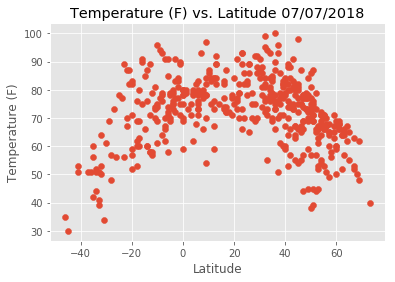

In [57]:
# import datetime
# date = datetime.date.today()
import time
date = time.strftime("%m/%d/%Y")
# print(date)
plt.scatter(samplecity['latitude'],samplecity['temperature'])
plt.title(f"Temperature (F) vs. Latitude {date}")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.style.use('ggplot')
plt.savefig("Temperature.png")
plt.show()

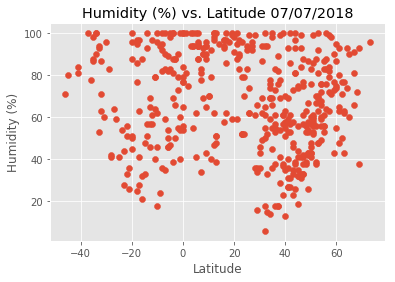

In [58]:
# plt.scatter(latitude,humidity)
plt.scatter(samplecity['latitude'], samplecity['humidity'])
plt.title(f"Humidity (%) vs. Latitude {date}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.style.use('ggplot')
plt.savefig("Humidity.png")
plt.show()

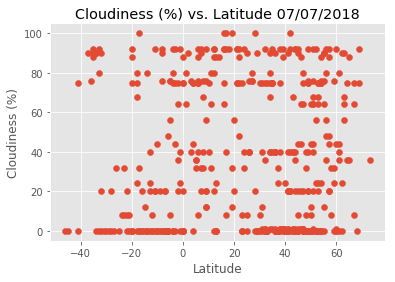

In [59]:
# plt.scatter(latitude,cloudy)
plt.scatter(samplecity['latitude'], samplecity['cloudiness'])
plt.title(f"Cloudiness (%) vs. Latitude {date}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.style.use('ggplot')
plt.savefig("Cloudiness.png")
plt.show()

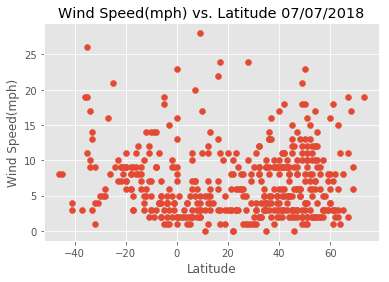

In [60]:
# plt.scatter(latitude,windspeed)
plt.scatter(samplecity['latitude'], samplecity['wind_speed'])
plt.title(f"Wind Speed(mph) vs. Latitude {date}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.style.use('ggplot')
plt.savefig("Wind_Speed.png")
plt.show()

In [61]:
# samplecity = samplecity[samplecity.latitude != ""]
#above works to remove blank answers
#Make into CSV
samplecity.to_csv("sampleweather.csv", encoding="utf-8", index=False)
df = pd.read_csv("sampleweather.csv")
df.head()

,city,country,latitude,longitude,temperature,humidity,cloudiness,wind_speed
0,irara,br,-8,-8,79,95,0,14
1,port shepstone,za,-30,-30,61,96,0,5
2,kodar,in,16,16,74,97,100,6
3,sulmona,it,42,42,80,57,0,5
4,yongan,cn,39,39,60,100,92,2


# Analysis

